### 참고 캐글

- 캐글은 데이터 분석 & 모델링 코드 공유하는 사이트, 같은 데이터에 대해 다양한 사람들이 분석한 과정을 공유하고 인사이트를 얻을 수 있음.    
아래 노트북에서 파이썬으로 이런식으로 EDA(데이터 탐색)과 시각화를 하는구나만 확인해보자    


[1. 캐글노트북](https://www.kaggle.com/code/duygut/eda-booking-cancelation-prediction)    
[2. 캐글노트북](https://www.kaggle.com/code/amarloni/eda-best-regression-data-visualization)     
[3. 캐글노트북](https://www.kaggle.com/code/abdokamr/eda-by-seaborn-feature-engineering-for-beginners)     
[4. 캐글노트북](https://www.kaggle.com/code/niteshyadav3103/hotel-booking-prediction-99-5-acc)    
[5. 캐글노트북](https://www.kaggle.com/code/atasaygin/hotel-booking-demand-eda-and-of-guest-prediction)      

### 문서 설명
- 단순히 가이드를 위해 작성된 문서    
  탐색적 데이터 분석(EDA,Exploratory Data Analysis)의 과정을 간단히 정리
   
- 접근방향을 전혀 모르겠다면 참고하고 스스로 분석해보고 싶은 방향이 있었다면 그 방향으로 가기
- 간단 버전이기 때문에 이걸 시작으로 더 궁금한 것들이 생긴다면 다양하게 분석해보기

- 이상치는 모두 제거해야 하는가? 결측치는 모두 제거해야 하는가? 정확한 정답은 없고, 데이터 특성에 따라 판단

테블로는 전처리가 끝난 간단한 데이터를 업로드해서 시각화 해보기    
미션6는 보고서와 주피터노트북을 제출해야함. 

| 컬럼명                              | 설명                                                |
| -------------------------------- | ------------------------------------------------- |
| `hotel`                          | 호텔명 (Resort Hotel 혹은 City Hotel)                  |
| `is_canceled`                    | 호텔 예약이 취소되었는지(1) 혹은 취소되지 않았는지(0)를 나타내는 값          |
| `lead_time`                      | 호텔 예약 시점부터 고객의 호텔 도착 시점까지의 기간 (단위: 일)             |
| `arrival_date_year`              | 고객의 호텔 도착 연도                                      |
| `arrival_date_month`             | 고객의 호텔 도착 월                                       |
| `arrival_date_week_number`       | 고객의 호텔 도착 주 (예: 2015년도 셋째 주 → 3)                  |
| `arrival_date_day_of_month`      | 고객의 호텔 도착 일 (예: 3월 2일 → 2)                        |
| `stays_in_weekend_nights`        | 주말 숙박(토~일) 밤 수                                    |
| `stays_in_week_nights`           | 주중 숙박(월~금) 밤 수                                    |
| `adults`                         | 예약된 어른의 수                                         |
| `children`                       | 예약된 어린이의 수                                        |
| `babies`                         | 예약된 아기의 수                                         |
| `meal`                           | 예약된 식사 유형 (아래 참고)                                 |
| `country`                        | 투숙객 출신 국가 (ISO 3166 국가 코드)                        |
| `market_segment`                 | 시장 세그먼트 (TA: Travel Agent, TO: Tour Operators 등)  |
| `distribution_channel`           | 예약 유통 채널 (TA: Travel Agent, TO: Tour Operators 등) |
| `is_repeated_guest`              | 재방문 고객 여부 (1: 예, 0: 아니오)                          |
| `previous_cancellations`         | 현재 예약 이전에 취소한 예약 수                                |
| `previous_bookings_not_canceled` | 현재 예약 이전에 취소하지 않은 예약 수                            |
| `reserved_room_type`             | 예약한 객실 타입 코드                                      |
| `assigned_room_type`             | 실제 배정된 객실 타입 코드                                   |
| `booking_changes`                | 예약 시점부터 취소/체크인 전까지 변경 횟수                          |
| `agent`                          | 예약을 진행한 여행사 ID                                    |
| `company`                        | 예약 또는 결제 책임이 있는 회사/단체 ID                          |
| `days_in_waiting_list`           | 예약 대기자 명단에 있었던 일수                                 |
| `required_car_parking_spaces`    | 고객이 요구한 주차 공간 수                                   |
| `total_of_special_requests`      | 특별 요청 건수 (예: 트윈 베드, 아기 침대 등)                      |
| `reservation_status`             | 예약의 최종 상태 (아래 참고)                                 |
| `reservation_status_date`        | 최종 예약 상태가 설정된 날짜                                  |


[참고]
국가코드 데이터 추출

In [32]:
import pandas as pd
import requests
from io import StringIO

url = "https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
}

html = requests.get(url, headers=headers).text
tables = pd.read_html(StringIO(html))

country_df = tables[0].iloc[1:,[0,2,3]]
country_df.columns =['국가명','2글자축약어','3글자축약어']
country_df.head(5)

,국가명,2글자축약어,3글자축약어
1,Afghanistan,AF,AFG
2,Åland Islands,AX,ALA
3,Albania,AL,ALB
4,Algeria,DZ,DZA
5,American Samoa,AS,ASM


### 데이터 이해 & 판다스 연습을 위한 연습 문제

In [10]:
import pandas as pd
import koreanize_matplotlib # !pip install koreanize-matplotlib
import missingno # !pip install missingno

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pd.set_option('display.max_columns',100) # 보여지는 최대 컬럼 숫자 증가

In [33]:
df = pd.read_csv('./hotel_data_modified.csv')
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,NaN,NaN,0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,NaN,NaN,0,0,0,Check-Out,2015-07-01


# Q1 데이터 분포
- 타입 / 결측치 / 기술통계량 등

In [37]:
# 전체 11만행, 29개 컬럼
df.shape

(119390, 29)

In [40]:
# 결측치 확인
# company 컬럼은 제거 -> company값이 있는 경우는 8천행으로 여유가 있다면 별도로 필터해서 분석해볼 수 있음
# agent와 country 결측치가 있는 행은 제거
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
agent                              16340
company                           112593
days_in_waiting_

<Axes: >

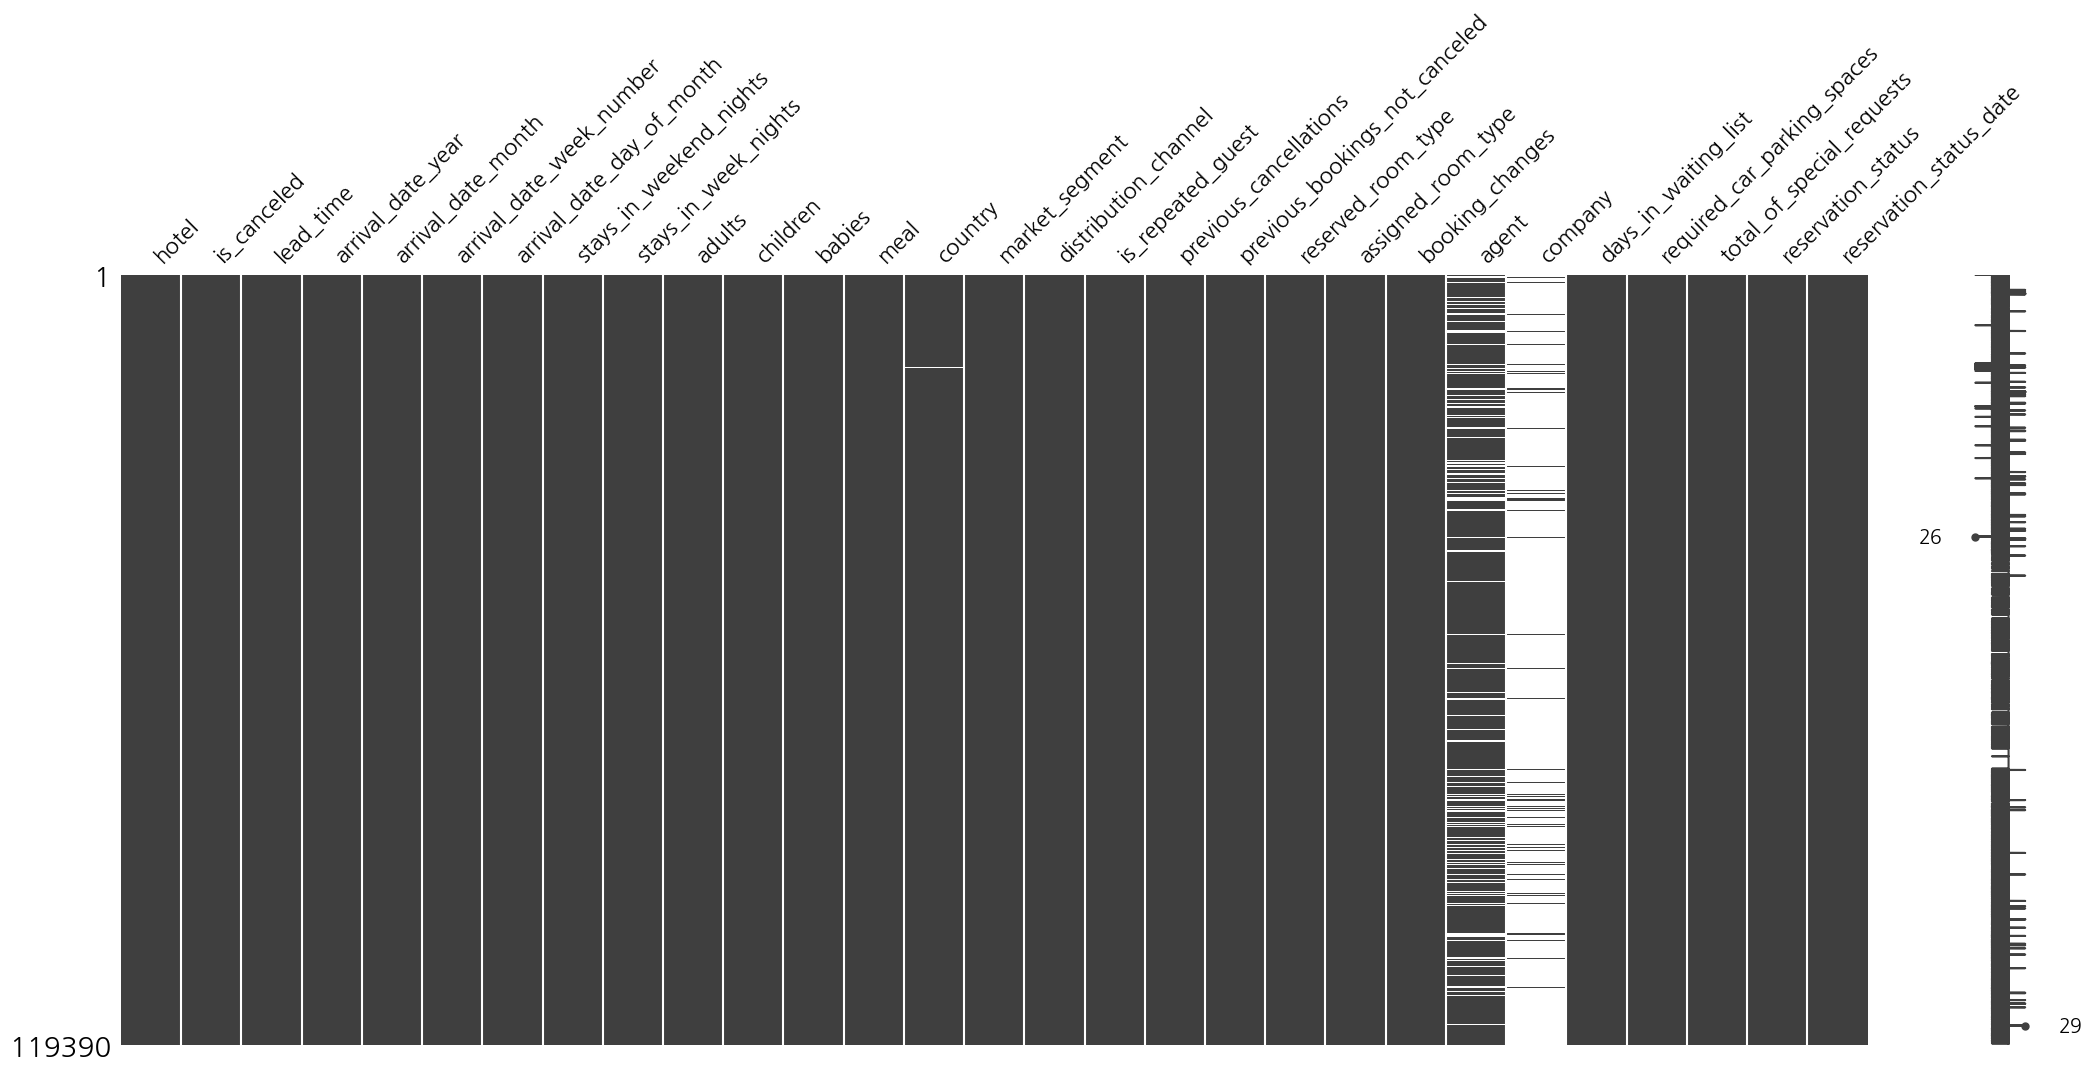

In [35]:
missingno.matrix(df)

In [44]:
# object 10개, 그 외 숫자형
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [51]:
df.describe().T[['count','mean','50%','min','max']]

# is_canceled : 범주형 변경 필요
# arrival_date_year : 년도
# adults : 55명 등 대규모 예약 정보도 있다
# babies : 10명 등 대규모 예약 정보도 있다.
# days_in_waiting_list : 예약 대기자 명단에 1년 이상 있었던 경우가 있음

,count,mean,50%,min,max
is_canceled,119390.0,0.370416,0.0,0.0,1.0
lead_time,119390.0,104.011416,69.0,0.0,737.0
arrival_date_year,119390.0,2016.156554,2016.0,2015.0,2017.0
arrival_date_week_number,119390.0,27.165173,28.0,1.0,53.0
arrival_date_day_of_month,119390.0,15.798241,16.0,1.0,31.0
stays_in_weekend_nights,119390.0,0.927599,1.0,0.0,19.0
stays_in_week_nights,119390.0,2.500302,2.0,0.0,50.0
adults,119390.0,1.856403,2.0,0.0,55.0
children,119386.0,0.103890,0.0,0.0,10.0
babies,119390.0,0.007949,0.0,0.0,10.0


In [54]:
# 범주형
df.describe(include='O').T

# 호텔은 2개 정보에 대한 것
# 177개국에서 예약을 했다.
# market_segment , distribution_channel는 어떤 의미인지 명세에서 추가 파악해야할 듯
# 

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
reservation_status,119390,3,Check-Out,75166
reservation_status_date,119390,926,2015-10-21,1461


# Q2 market_segment	distribution_channel 관계
- pd.crosstab으로 확인

In [69]:
pd.crosstab(df['market_segment'],df['distribution_channel'])

distribution_channel,Corporate,Direct,GDS,TA/TO,Undefined
market_segment,,,,,
Aviation,227,0,0,10,0
Complementary,89,576,0,78,0
Corporate,4788,172,0,335,0
Direct,90,12276,1,237,2
Groups,1228,1472,0,17111,0
Offline TA/TO,212,16,45,23946,0
Online TA,43,133,147,56153,1
Undefined,0,0,0,0,2


# Q3 agent와 company 관계 
- pd.crosstab으로 확인

In [74]:
(pd.crosstab(df['agent'],df['company']) != 0).sum(axis=1).sort_values(ascending=False) # 1개의 agent가 여러개의 company 정보를 가지고 있는 경우가 있다.

agent
9.0      9
250.0    6
14.0     4
240.0    4
290.0    2
184.0    2
5.0      1
223.0    1
405.0    1
334.0    1
328.0    1
326.0    1
324.0    1
314.0    1
242.0    1
195.0    1
196.0    1
7.0      1
185.0    1
159.0    1
146.0    1
143.0    1
139.0    1
85.0     1
45.0     1
40.0     1
27.0     1
444.0    1
dtype: int64

In [75]:
(pd.crosstab(df['agent'],df['company']) != 0).sum(axis=0).sort_values(ascending=False) # 1개의 company가 여러개의 agent를 가지고 있는 경우도 있다.

company
281.0    4
405.0    1
313.0    1
324.0    1
331.0    1
333.0    1
360.0    1
361.0    1
379.0    1
395.0    1
399.0    1
9.0      1
312.0    1
417.0    1
419.0    1
421.0    1
436.0    1
439.0    1
442.0    1
444.0    1
478.0    1
485.0    1
412.0    1
301.0    1
14.0     1
273.0    1
29.0     1
40.0     1
45.0     1
61.0     1
84.0     1
85.0     1
99.0     1
113.0    1
126.0    1
132.0    1
146.0    1
148.0    1
184.0    1
186.0    1
223.0    1
229.0    1
242.0    1
250.0    1
268.0    1
499.0    1
dtype: int64

# Q4 결측치 제거
- [참고]데이터 탐색 과정에는 결측치 제거 없이 보는게 좋다
- company 컬럼 제거
- 그 외 결측치 행 제거

In [130]:
# 결측치 제거
df_dropna = df.drop(columns =['company'])
df_dropna = df_dropna.dropna().reset_index(drop=True) # 인덱스 초기화는 꼭해주자

df_dropna.shape,df.shape

((102894, 28), (119390, 29))

# Q5 고객의 호텔 도착 시각 컬럼들의 정보를 모아 date형식으로 바꾸어라
- pd.to_datetime 이용

In [134]:
df_dropna['arrival_date'] = pd.to_datetime(
    df_dropna['arrival_date_year'].astype('str') + \
    df_dropna['arrival_date_month'].astype('str') + \
    df_dropna['arrival_date_day_of_month'].astype('str'),
    format = '%Y%B%d'
)

df_dropna['arrival_date'].head(2)

0   2015-07-01
1   2015-07-01
Name: arrival_date, dtype: datetime64[ns]

# Q6 최종 예약 상태 날짜를 date 형식으로 바꾸어라
- reservation_status_date 컬럼

In [86]:
df_dropna['reservation_status_date'] = pd.to_datetime(df_dropna['reservation_status_date'])

# Q7 두 호텔의 년도-월별 도착 건수를 시각화하라

Text(0.5, 1.0, '두 호텔의 월별 예약 건수')

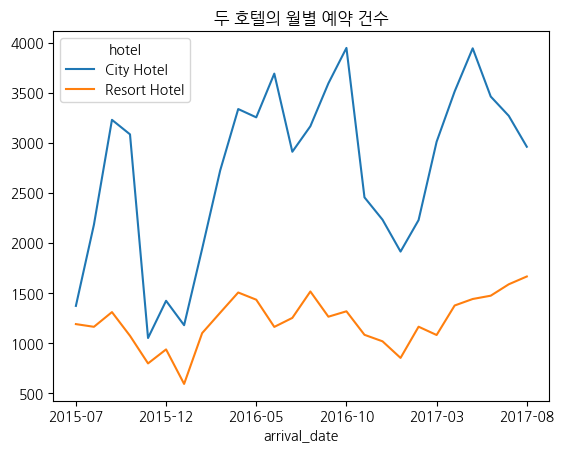

In [101]:
# .unstack()은 groupby된 데이터를 자동으로 pivot 해주는 효과
# .unstack() 제외한 코드 동작 확인해보면 이해가능!
group_df = df_dropna.groupby([df_dropna['arrival_date'].dt.strftime('%Y-%m'),'hotel']).size().unstack()
group_df.plot()
plt.title('두 호텔의 월별 예약 건수')

# q8. 두 호텔의 최종 예약상태를 년-월 기준으로 건수 파악하여 시각화

Text(0.5, 1.0, '두 호텔의 월별 최종 예약상태 건수')

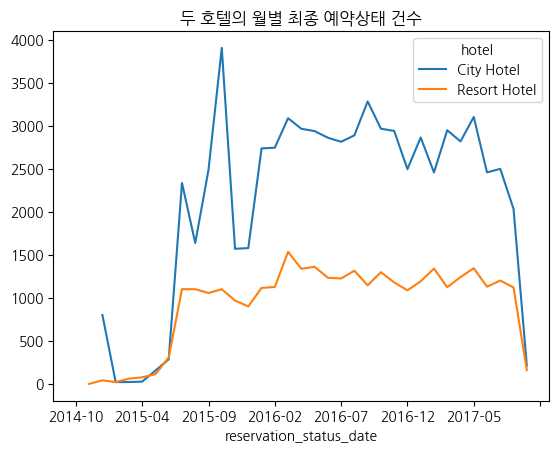

In [102]:
# .unstack()은 groupby된 데이터를 자동으로 pivot 해주는 효과
# .unstack() 제외한 코드 동작 확인해보면 이해가능!
group_df = df_dropna.groupby([df_dropna['reservation_status_date'].dt.strftime('%Y-%m'),'hotel']).size().unstack()
group_df.plot()
plt.title('두 호텔의 월별 최종 예약상태 건수')

최종 예약상태 일자가 도착 일자보다 앞인 경우가 있다.
그런 경우는 최종 예약상태 일자는 예약한 날짜고, 고객은 취소한 경우가 아닐까 싶다

# q9. 호텔별 호텔 예약 시점부터 고객의 호텔 도착 시점까지의 기간(lead_time)의 히스토그램과 box

In [119]:
# city hotel이 resort hotel 보다 2배 정도 많은 데이터를 가짐
# city 호텔이 평균과 중위수가 모두 크다.
df_dropna.groupby(['hotel'])['lead_time'].describe().T

hotel,City Hotel,Resort Hotel
count,71181.000000,31713.000000
mean,116.833116,100.308612
std,112.541641,94.889518
min,0.000000,0.000000
25%,29.000000,20.000000
50%,82.000000,72.000000
75%,172.000000,164.000000
max,629.000000,542.000000


<Axes: xlabel='lead_time', ylabel='Count'>

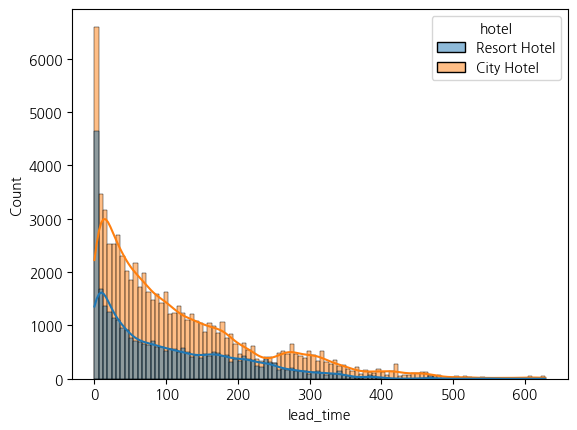

In [118]:
# 두 호텔 모두 비슷한 분포를 보임
# city 호텔의 경우 300일 이후에 증가하는 추세가 보임, 프로모션 등이 있었나(agent 등의) 확인해볼 필요있음
sns.histplot(data=df_dropna,x='lead_time',hue='hotel',kde=True)

<Axes: xlabel='hotel', ylabel='lead_time'>

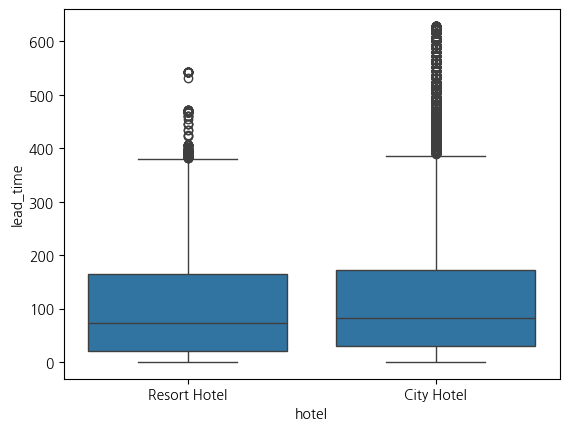

In [106]:
sns.boxplot(data=df_dropna,x='hotel',y='lead_time')

# q10. 호텔 별 숙박, 취소 건수 확인
- pd.crosstab

In [124]:
pd.crosstab(df['hotel'],df['is_canceled'])

is_canceled,0,1
hotel,,
City Hotel,46228,33102
Resort Hotel,28938,11122


In [127]:
pd.crosstab(df['hotel'],df['is_canceled'],normalize=0) # normalize=0 행 방향의 비율

# city 호텔의 경우 41퍼센트의 취소 비율을 보인다
# resort hotel의 경우 27퍼센트의 취소 비율을 보인다.
# 주어진 기간내의 모든 예약 건이 아닌 샘플된 데이터일 수 있다.

is_canceled,0,1
hotel,,
City Hotel,0.582730,0.417270
Resort Hotel,0.722366,0.277634


# q11. 호텔,년도-월별,취소여부 별 건수 확인 (시각화, 상관계수)

,arrival_date,is_canceled,hotel,0
0,15-07,0,City Hotel,439


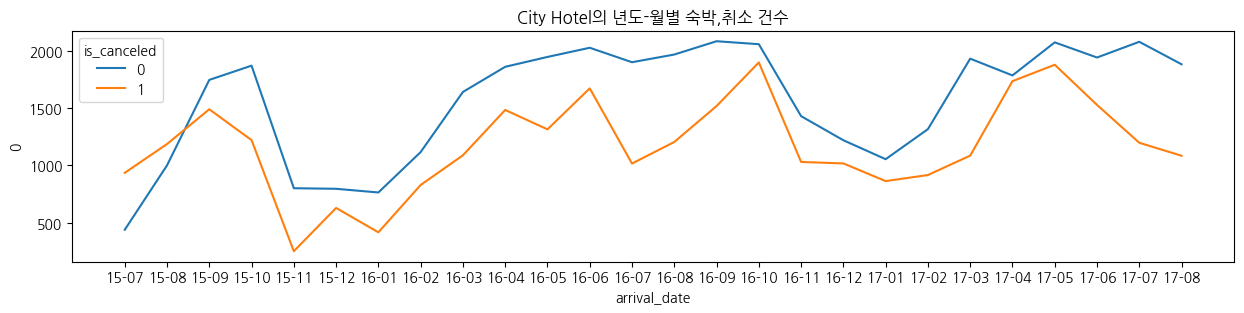

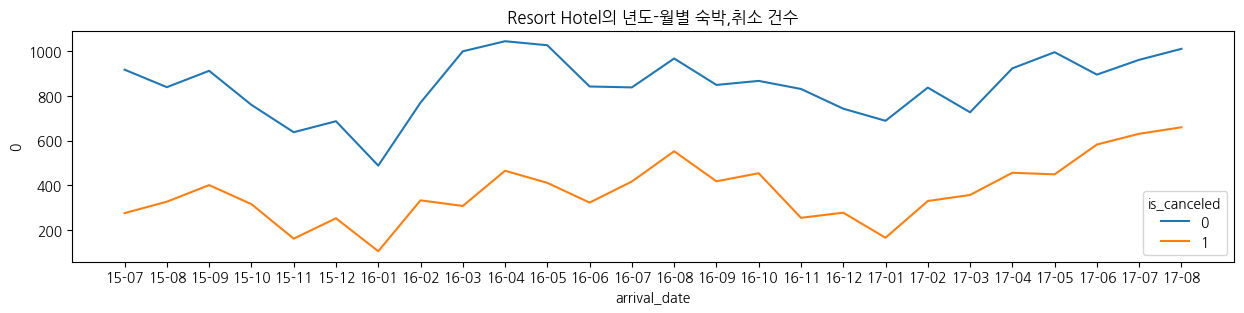

In [171]:
group_df=df_dropna.groupby([df_dropna['arrival_date'].dt.strftime('%y-%m'),'is_canceled','hotel'],).size().reset_index()
display(group_df.head(1))

plt.figure(figsize=(15,3))
sns.lineplot(data= group_df[group_df['hotel'] =='City Hotel'], x ='arrival_date',y = 0,hue='is_canceled')
plt.title('City Hotel의 년도-월별 숙박,취소 건수')
plt.show()

plt.figure(figsize=(15,3))
sns.lineplot(data= group_df[group_df['hotel'] =='Resort Hotel'], x ='arrival_date',y = 0,hue='is_canceled')
plt.title('Resort Hotel의 년도-월별 숙박,취소 건수')
plt.show()

두 호텔 모두 전체 기간에 대해 숙박과 취소 건수가 비슷한 경향으로 진행된다.

In [176]:
# 상관계수 확인
group_df_city = group_df[group_df['hotel'] =='City Hotel']
group_df_resort= group_df[group_df['hotel'] =='Resort Hotel']

city_pivot = pd.pivot_table(group_df_city,index='arrival_date',columns ='is_canceled',values=0)
resort_pivot = pd.pivot_table(group_df_resort,index='arrival_date',columns ='is_canceled',values=0)

In [177]:
city_pivot.corr()

is_canceled,0,1
is_canceled,,
0,1.000000,0.762099
1,0.762099,1.000000


In [178]:
resort_pivot.corr()

is_canceled,0,1
is_canceled,,
0,1.000000,0.756582
1,0.756582,1.000000


그래프 패턴에서 봤던 것처럼 높은 상관성을 가진다.

# q13. country_name을 만들고 country에 해당하는 국가를 맵핑해라
- 코드 처음에 정의한 country_df 사용
- 아래 딕셔너리 이용
```python
country_dict = {v:k for k,v in country_df[['국가명','3글자축약어']].values}
country_dict['CN'] = 'China' # 중국만 2글자로 있음..
country_dict['TMP'] = 'Timor-Leste[ab]' # 동티모르 TMP -> TLS로 변경됨

In [217]:
country_dict = {v:k for k,v in country_df[['국가명','3글자축약어']].values}
country_dict['CN'] = 'China' # 중국만 2글자로 있음..
country_dict['TMP'] = 'Timor-Leste[ab]' # 동티모르 TMP -> TLS로 변경됨

In [218]:
df_dropna['country_name'] = df_dropna['country'].apply(lambda x : country_dict[x] )
# df_dropna['country_name'] = df_dropna['country'].map(country_dict) # 같은 의미, 딕셔너리에 없는 값은 자동으로 None으로 만들어줌

In [286]:
# 포르투갈이 가장 많음, 유럽 대부분의 국가가 상위 정보를 가지고, 아시아 에서는 중국이 가장 많음
count_counts =df_dropna['country_name'].value_counts()
count_counts_n =df_dropna['country_name'].value_counts(normalize=True)

n = pd.DataFrame()
n['count'] = count_counts
n['proportion(%)'] = count_counts_n
n.head(10)

,count,proportion(%)
country_name,,
Portugal,37591,0.365337
United Kingdom of Great Britain and Northern Ireland (the),10889,0.105827
France[l],9810,0.095341
Spain,7848,0.076273
Germany,6998,0.068012
Italy,3555,0.034550
Ireland,3198,0.031081
China,2188,0.021265
Belgium,2156,0.020954


# q14. 데이터 비중이 많은 상위 10개 국가의 호텔별 예약 비율확인
- 숙박 / 예약 취소 비율도 확인해보기

In [274]:
high =df_dropna['country'].value_counts().index[:10]
df_filter = df_dropna[df_dropna['country'].isin(high)] # isin은 컬럼에 리스트 값들이 있는지 검증 (is-in)

In [275]:
city_df_filter = df_filter.query('hotel =="City Hotel"')
resort_df_filter = df_filter.query('hotel !="City Hotel"')

In [276]:
# city
# 예약 건수가 가장 많은 포르투갈을 제외하고는 취소건수가 더 높은 국가는 드물다. 
# 포르투갈에 의해 모델이 편향을 가질수 있음
pd.crosstab(city_df_filter['country'],city_df_filter['is_canceled']).loc[high] # .loc[high]는 정렬을 하기 위해서

is_canceled,0,1
country,,
PRT,7738,17568
GBR,3629,1561
FRA,6677,1687
ESP,2865,1319
DEU,4831,1067
ITA,1927,1251
IRL,763,400
BEL,1381,412
BRA,968,726


In [277]:
# city
# 포르투갈은 3:7 그 외 대부분 국가는 7:3의 비율을 가짐
pd.crosstab(city_df_filter['country'],city_df_filter['is_canceled'],normalize=0).loc[high]

is_canceled,0,1
country,,
PRT,0.305777,0.694223
GBR,0.699229,0.300771
FRA,0.798302,0.201698
ESP,0.684751,0.315249
DEU,0.819091,0.180909
ITA,0.606356,0.393644
IRL,0.656062,0.343938
BEL,0.770218,0.229782
BRA,0.571429,0.428571


In [278]:
# resort
# 예약 건수가 가장 많은 포르투갈을 제외하고는 취소건수가 더 높은 국가는 드물다. 
# 포르투갈에 의해 모델이 편향을 가질수 있음
pd.crosstab(resort_df_filter['country'],resort_df_filter['is_canceled']).loc[high] # .loc[high]는 정렬을 하기 위해서

is_canceled,0,1
country,,
PRT,6128,6157
GBR,4907,792
FRA,1236,210
ESP,2815,849
DEU,955,145
ITA,297,80
IRL,1604,431
BEL,306,57
BRA,291,101


In [279]:
# resort
# 포르투갈은 5:5 그 외 대부분 국가는 8:2의 비율을 가짐
pd.crosstab(resort_df_filter['country'],resort_df_filter['is_canceled'],normalize=0).loc[high]

is_canceled,0,1
country,,
PRT,0.498820,0.501180
GBR,0.861028,0.138972
FRA,0.854772,0.145228
ESP,0.768286,0.231714
DEU,0.868182,0.131818
ITA,0.787798,0.212202
IRL,0.788206,0.211794
BEL,0.842975,0.157025
BRA,0.742347,0.257653


포르투갈과 그렇지 않은 국가를 나눠서 분석하는 것도 방법

# q15. 예약의 최종 상태(reservation_status)의 분포확인
- 실제 is_canceled와 일치하는지
- 국가별 / 호텔별 reservation_status 값은 어떤지?

In [287]:
df_dropna['reservation_status'].value_counts()

reservation_status
Check-Out    62733
Canceled     39158
No-Show       1003
Name: count, dtype: int64

노쇼와 체크아웃 취소 3가지 상태가 존재

In [289]:
pd.crosstab(df_dropna['reservation_status'],df_dropna['is_canceled'])
# 모든 예약 취소 상태(is_canceled=1)은 노쇼와 예약 취소 건수가 모두 포함 되어 있다

is_canceled,0,1
reservation_status,,
Canceled,0,39158
Check-Out,62733,0
No-Show,0,1003


In [290]:
# hotel-canceled 컬럼을 생성
# 비율은 호텔 상관없이 비슷해 보임
df_dropna['hotel-canceled'] = df_dropna['hotel'] + '_' + df_dropna['is_canceled'].astype('str')
pd.crosstab(df_dropna['reservation_status'],df_dropna['hotel-canceled'])

hotel-canceled,City Hotel_0,City Hotel_1,Resort Hotel_0,Resort Hotel_1
reservation_status,,,,
Canceled,0,29691,0,9467
Check-Out,40704,0,22029,0
No-Show,0,786,0,217


In [294]:
# 노쇼 국가 
# 포르투갈아...
# Angola는 예약 상위권에 없었지만 노쇼 비율이 높은 편
df_dropna[df_dropna['reservation_status'] =='No-Show']['country_name'].value_counts().head(10)

country_name
Portugal                                                      575
Angola                                                         60
United Kingdom of Great Britain and Northern Ireland (the)     41
China                                                          31
Brazil                                                         31
France[l]                                                      30
Spain                                                          30
United States of America (the)                                 28
Italy                                                          18
Germany                                                        13
Name: count, dtype: int64

# q16. 아래 4가지 컬럼과 다른 컬럼들 간의 관계 분석
- 현재 예약 이전에 취소한 예약 수(previous_cancellations) 
- 현재 예약 이전에 취소하지 않은 예약 수(previous_bookings_not_canceled)
- 예약 시점부터 취소/체크인 전까지 변경 횟수(booking_changes)
- 재방문 고객여부(is_repeated_guest) : 1예

In [296]:
df_dropna[['previous_cancellations','previous_bookings_not_canceled','booking_changes','is_repeated_guest']].describe()

,previous_cancellations,previous_bookings_not_canceled,booking_changes,is_repeated_guest
count,102894.000000,102894.000000,102894.000000,102894.000000
mean,0.077215,0.024365,0.201780,0.014034
std,0.758185,0.435759,0.624954,0.117631
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,26.000000,50.000000,18.000000,1.000000


- 4개 컬럼 모두 75%값 이상이 0을 가진다
- previous_cancellations + previous_bookings_not_canceled 값은 이전에 예약숫자로 볼 수 있다.
- 취소가 많은 유저는 ~블랙컨슈머~ 에이전시나 회사 고객이지 않을까

In [302]:
# 현재 예약 이전에 취소한 예약 수
# 취소 건수가 1인 유저는 압도적으로 취소 비율이 높다.
# 11건인 유저는 25건의 예약을 모두 체크인했다. -> 같은 유저이지 않을까 싶음
# 24,25,26 예약 취소한 사람들도 취소 건수가 모두 동일 -> 데이터 상에서 previous_cancellations 컬럼은 최신화된 업데이트 정보를 보여 주는 듯
pd.crosstab(df_dropna['previous_cancellations'],df_dropna['is_canceled'])

is_canceled,0,1
previous_cancellations,,
0,62652,34687
1,37,5347
2,17,19
3,1,8
5,1,0
6,0,6
11,25,0
13,0,4
14,0,14


# 불필요 컬럼 제거 및 간단한 통계검정과 로지스틱 회귀 분석
- 탐색 이후 궁금한 부분이 남아 있다면 추가적인 분석진행

# q17. 추가적인 컬럼을 생성한다. (파생변수)
- people : adults children babies의 합을 넣는다
- pre_bookings : previous_cancellations +  previous_bookings_not_canceled

In [306]:
df_dropna['people'] = df_dropna['adults'] + df_dropna['children'] + df_dropna['babies']
df_dropna['pre_bookings'] = df_dropna['previous_cancellations'] + df_dropna['children'] + df_dropna['previous_bookings_not_canceled']

In [307]:
df_dropna.head(1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,country_name,hotel-canceled,people,pre_bookings
0,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,304.0,0,0,0,Check-Out,2015-07-02,2015-07-01,United Kingdom of Great Britain and Northern I...,Resort Hotel_0,1.0,0.0


# q17. 불필요 컬럼 제거

In [319]:
# 로지스틱 회귀분석과 통계검정 등을 위한 컬럼 제거. 
# 최대한 간단하게 진행하기 위해 대부분 컬럼을 날렸지만, 취소여부를 예측하는데 유효한 컬럼이라고 판단한다면 남겨두기

drop_col = [
    'arrival_date_year',
    'arrival_date_month',
    'arrival_date_week_number',
    'arrival_date_day_of_month',
    'stays_in_weekend_nights',
    'stays_in_week_nights',
    'adults',
    'children',
    'babies',
    'previous_cancellations',
    'previous_bookings_not_canceled',
    'meal',
    'market_segment',
    'distribution_channel',
    'assigned_room_type',
    'booking_changes',
    'agent',
    'days_in_waiting_list',
    'required_car_parking_spaces',
    'total_of_special_requests',
    'reservation_status',
    'reservation_status_date',
    'hotel-canceled', # 이전에 만들었던 변수
    'country_name',   # 이전에 만들었던 변수
    'arrival_date'
]

In [316]:
df_drop = df_dropna.drop(columns =drop_col)
df_drop.head(1)

,hotel,is_canceled,lead_time,country,is_repeated_guest,reserved_room_type,people,pre_bookings
0,Resort Hotel,0,13,GBR,0,A,1.0,0.0


# q18. 남은 데이터 전처리
- 국가는 포르투갈이냐(1) 아니냐(0)으로 변경
- reserved_room_type은 A:0,B:1.. 으로 맵핑

In [338]:
df_drop = df_dropna.drop(columns =drop_col)
df_drop['country'] = df_drop['country'].apply(lambda x : 1 if x == 'PRT' else 0)

map_dic = {
    'A':0,
    'B':1,
    'C':2,
    'D':3,
    'E':4,
    "F":5,
    'G':6,
    "H":7
}

df_drop['reserved_room_type'] = df_drop['reserved_room_type'].apply(lambda x : map_dic[x] if x in map_dic.keys() else x)
df_drop['reserved_room_type'].value_counts()

reserved_room_type
0    73265
3    17535
4     5457
5     2537
6     1809
1      992
2      765
7      534
Name: count, dtype: int64

In [339]:
df_drop.head(1)

,hotel,is_canceled,lead_time,country,is_repeated_guest,reserved_room_type,people,pre_bookings
0,Resort Hotel,0,13,0,0,0,1.0,0.0


# q20. 호텔과 취소 여부 사이에는 연관이 있는가?
- 카이제곱검정
- crosstab 후 진행
- 귀무 대립 가설 설정

In [345]:
cdf = pd.crosstab(df_drop['hotel'],df_drop['is_canceled'])

# 귀무가설 : 두 범주형 변수를 서로 독립이다 (한 변수의 분포가 다른 변수에 영향을 받지 않는다)
# 대립가설 : 독립이 아니다. (연관이 있다.)

from scipy.stats import chi2_contingency
s,p,d,e = chi2_contingency(cdf)
print('pv:',p)

# p-value는 0에 가깝다. 유의수준 0.05하에서 귀무가설을 기각하고 대립가설을 채택한다. 호텔에 따른 취소여부 사이에는 연관이 있다.

pv: 3.676187990585806e-304


# q21. 호텔 룸타입(reserved_room_type)과 취소여부 사이의 관계
- 카이제곱 독립성

In [348]:
cdf = pd.crosstab(df_drop['reserved_room_type'],df_drop['is_canceled'])

# 귀무가설 : 두 범주형 변수를 서로 독립이다 (한 변수의 분포가 다른 변수에 영향을 받지 않는다)
# 대립가설 : 독립이 아니다. (연관이 있다.)

from scipy.stats import chi2_contingency
s,p,d,e = chi2_contingency(cdf)
print('pv:',p)

# p-value는 0에 가깝다. 유의수준 0.05하에서 귀무가설을 기각하고 대립가설을 채택한다. 호텔에 따른 취소여부 사이에는 연관이 있다.

pv: 2.9279534767174504e-124


# q22. 범주형 변수 원핫인코딩
- 범주형 변수가 있는 상태에서 pd.get_dummies(안배움)를 사용하면 원핫인코딩이 됨 (살짝 다룸)

In [355]:
# hotel 컬럼의 유니크한 범주형값들이 컬럼으로 됐다.
df_p = pd.get_dummies(df_drop,dtype='int') # ,dtype='int' 빼고하면 불리언 형식으로 출력됨
df_p.head(1)

,is_canceled,lead_time,country,is_repeated_guest,reserved_room_type,people,pre_bookings,hotel_City Hotel,hotel_Resort Hotel
0,0,13,0,0,0,1.0,0.0,0,1


# q23. statsmodels 라이브러리를 이용해서 is_canceled를 예측하는 로지스틱 회귀 모형
- 모델 결과 분석 / 해석

In [358]:
import statsmodels.api as sm
import pandas as pd

X = df_p.drop(columns =['is_canceled'])
y = df_p['is_canceled']

# 상수항 추가
X = sm.add_constant(X)
result = sm.Logit(y, X).fit()
result.summary()


Optimization terminated successfully.
         Current function value: 0.557398
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_canceled   No. Observations:               102894
Model:                          Logit   Df Residuals:                   102885
Method:                           MLE   Df Model:                            8
Date:                Fri, 23 Jan 2026   Pseudo R-squ.:                  0.1667
Time:                        11:20:36   Log-Likelihood:                -57353.
converged:                       True   LL-Null:                       -68825.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.4697   5.51e+04  -2.67e-05      1.000   -1.08e+05    1.08e+05
lead_time              0.0049   7.25e-05     67.728      0.000       0.005       0.005
country                1.6887      0.015    110.073      0.000       1.659       1.719
is_repeated_guest     -1.2836      0.071    -18.195      0.000      -1.422      -1.145
reserved_room_type     0.0395      0.005      7.906      0.000       0.030       0.049
people                 0.1718      0.013     12.886      0.000       0.146       0.198
pre_bookings           0.1351      0.011     12.596      0.000       0.114       0.156
hotel_City Hotel      -0.3923   5.51e+04  -7.12e-06      1.000   -1.08e+05    1.08e+05
hotel_Resort Hotel    -1.0775   5.51e+04  -1.96e-05      1.000   -1.08e+05    1.08e+05
======================================================================================
"""

LLR p-value : 모델의 유의성 판단 (0.05보다 한참 작음 -> 유의 / 귀무가설 : 모든 계수가 0이다)    
Pseudo R-square : 모델의 설명력을 나타냄     

각 변수들의 P값을 확인 
- hotel은 유의하지 않음, 카이제곱에서는 연관이 있다 봤지만 모델에서는 다른 결과

In [359]:
result.params # 각 변수의 회귀 계수

const                -1.469740
lead_time             0.004912
country               1.688674
is_repeated_guest    -1.283605
reserved_room_type    0.039498
people                0.171751
pre_bookings          0.135101
hotel_City Hotel     -0.392282
hotel_Resort Hotel   -1.077529
dtype: float64

In [360]:
import numpy as np
np.exp(result.params) # 오즈비

# 1보다 크면 : is_canceled가 1 이 될 확률이 증가한다.
# 1보다 작으면 : is_canceled가 1 이 될 확률이 낮아진다.
# 1이면     : : is_canceled에 거의 영향을 주지 않는다.

const                 0.229985
lead_time             1.004924
country               5.412297
is_repeated_guest     0.277037
reserved_room_type    1.040288
people                1.187382
pre_bookings          1.144652
hotel_City Hotel      0.675513
hotel_Resort Hotel    0.340436
dtype: float64